#Zomato Reviews Case Study


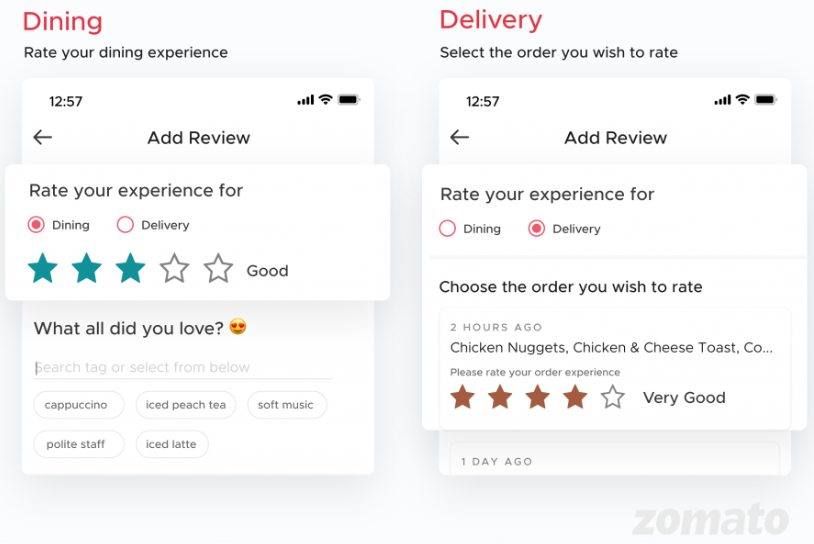

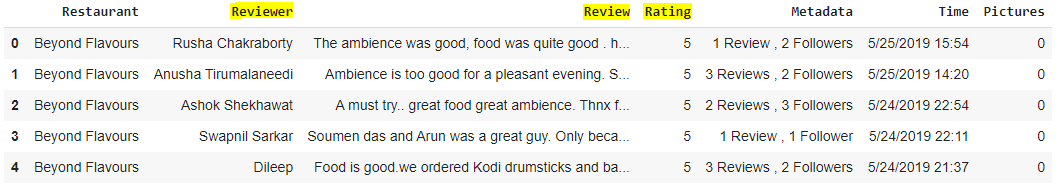

## Preprocessing Zomato Reviews

In this code demonstration, you will learn how to extract customer reviews from a given data file. After doing so, you will perform various text pre-processing steps that you have already learnt so far:
* Removing unnecessary elements like HTML tags, URLs and emojis
* Text encoding
* Removing special characters and symbols
* Converting the text to lower case
* Removing stopwords
* Stemming and lemmatisation

Once you get the customer reviews in a more readable format, you can further analyse these to understand customer sentiment. You will learn more about this and other such usages in the next session. 

### Importing the libraries

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk

import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p.neeraj.mendhekar\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Reading the input data

In [2]:
#Importing the training data
zomato=pd.read_csv('Restaurant reviews.csv')
print(zomato.shape)
zomato.head(5)

(10000, 7)


Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Example review

Let us consider an example review in Zomato with urls, html tags, emojis and other text noise.

In [3]:
text = u'<div><h1><Title>The apple π was [*][AMAZING][*] and YuMmY too\U0001f602! You can Checkout the entire Menu in https://www.zomato.com/chennai/top-restaurants</div></h1></Title>'
print(text)

<div><h1><Title>The apple π was [*][AMAZING][*] and YuMmY too😂! You can Checkout the entire Menu in https://www.zomato.com/chennai/top-restaurants</div></h1></Title>


### Removing HTML strips

In [4]:
#Removing the html strips
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [5]:
text = strip_html(text)
print(text)

The apple π was [*][AMAZING][*] and YuMmY too😂! You can Checkout the entire Menu in https://www.zomato.com/chennai/top-restaurants


### Removing URLs

After parsing the text and removing the html tags, let's now remove all hyper links (for example, urls containing "https://") from the text. We will use regular expressions to do so.

In [6]:
import re

text = re.sub(r"http\S+", "", text)
print(text)

The apple π was [*][AMAZING][*] and YuMmY too😂! You can Checkout the entire Menu in 


### Removing Emojis

Now, we will define a function to remove different types of emojis like smileys, symbols, gifs, flags and map symbols.

In [7]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [8]:
text = deEmojify(text)
print(text)

The apple π was [*][AMAZING][*] and YuMmY too! You can Checkout the entire Menu in 


### Text encoding

Let us consider some examples of different encodings - **UTF-8, ASCII and typical string.**

- Notice the 'b' in front of the text; which basically says the data is in bytes format. 

- Typically we prefer UTF-8 encoding, as it is devoid of foreign characters. 

In this case we will first remove the "pi" symbol and then convert the text to UTF-8 format.

In [9]:
text.encode('utf-8', 'ignore')

b'The apple \xcf\x80 was [*][AMAZING][*] and YuMmY too! You can Checkout the entire Menu in '

In this example, if we print the text as unicode-encoded, we can notice the "pi" symbol is translated to some xml tags.

In [10]:
#In our context, we would want to remove the 'pi' symbol from the review, hence we considered ascii encoding.
text = text.encode('ascii', 'ignore')
print(text)

b'The apple  was [*][AMAZING][*] and YuMmY too! You can Checkout the entire Menu in '


In [11]:
def to_unicode(text):
    if isinstance(text, float):
        text = str(text)
    if isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text

In [12]:
#As you noticed above, there was a 'b' character before the text because it is in byte format after ascii encoding, 
#so let us convert back to utf-8 encoding
text = to_unicode(text)
print(text)

The apple  was [*][AMAZING][*] and YuMmY too! You can Checkout the entire Menu in 


### Removing symbols

In [13]:
#Removing the square brackets, symbols
import re,string

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [14]:
text = remove_between_square_brackets(text)
print(text)

The apple  was  and YuMmY too! You can Checkout the entire Menu in 


### Removing special characters

In [15]:
#Function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [16]:
text = remove_special_characters(text)
print(text)

The apple  was  and YuMmY too You can Checkout the entire Menu in 


### Lowercase conversion

In [17]:
#Converting text to lowercase for standardisation
text = text.lower()
print(text)

the apple  was  and yummy too you can checkout the entire menu in 


### Preprocessing Zomato reviews

In [18]:
#Collating all functions together and applying it for the zomato reviews dataset
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def to_unicode(text):
    if isinstance(text, float):
        text = str(text)
    if isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = to_unicode(text)
    text = strip_html(text)
    text = re.sub(r"http\S+", "", text)
    text = deEmojify(text)
    text = text.encode('ascii', 'ignore')
    text = to_unicode(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = text.lower()
    return text


In [19]:
#Raw example of randomly selected review
zomato['Review'][111]

"We ordered tandoori chicken as starters that's very tasty and light and then butter naan with mutton masala and as main course we ordered chicken biryani, egg and mutton biryani those are very very tasty and light mutton piecs cooked with perfection"

In [20]:
#Apply function on review column
zomato['Review']=zomato['Review'].apply(denoise_text)

zomato['Review'].head()

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object

In [21]:
#Processed example of randomly selected review
zomato['Review'][111]

'we ordered tandoori chicken as starters thats very tasty and light and then butter naan with mutton masala and as main course we ordered chicken biryani egg and mutton biryani those are very very tasty and light mutton piecs cooked with perfection'

### Removing stopwords

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

In [23]:
#Tokenization of text
tokenizer=ToktokTokenizer() 

In [24]:
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [25]:
#Removing standard english stopwords like prepositions, adverbs
from nltk.tokenize import word_tokenize,sent_tokenize

stop=set(stopwords.words('english'))
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


{"needn't", 'against', 'there', "hasn't", 'isn', 'up', 'a', 'very', 'its', 'wouldn', 'while', 'own', 'how', 'before', 'couldn', 'itself', 'having', 'is', 'themselves', 'won', "wouldn't", 'o', "don't", 'other', 'were', 'all', 'an', 'but', 'why', "you'd", 'have', 'those', "should've", 't', 'or', 'now', "doesn't", 'was', 'does', 'yourself', 'mightn', 'which', 'his', 'yourselves', 'once', 'few', 'doesn', 'between', "shan't", 'not', 'our', 'into', 'weren', 'it', "you're", 'had', "you'll", 'been', 'her', 'aren', 'hadn', 'will', 're', 'shan', 'am', 'with', 'as', 'shouldn', 'theirs', 'haven', 'doing', 'him', 'than', 'are', 'this', "wasn't", 'these', 'most', 'both', 'ourselves', 'mustn', 'to', 'off', "mustn't", 'hers', 'herself', 'be', "shouldn't", 'what', 'only', 've', 'myself', 'do', 'their', 'should', 'they', 'some', 'about', 'by', 'ours', 'further', 'the', 'just', 'hasn', "weren't", 'if', 'no', 'i', "that'll", 'when', "mightn't", 'll', 'you', 'each', 'my', 'on', 'during', 'can', "didn't", '

In [26]:
#Raw example of randomly selected review text
zomato['Review'][678]

'you need to improve your packing had ordered veg thai green curry with rice by the time it was delivered to me curry had splashed all over the container  even leaking from package zomato delivery person said it leaked while getting it had second thoughts abt whether to consume it or not'

In [27]:
#Apply function on review column
zomato['Review']=zomato['Review'].apply(remove_stopwords)

In [28]:
#Processed example of randomly selected review text
zomato['Review'][678]

'need improve packing ordered veg thai green curry rice time delivered curry splashed container even leaking package zomato delivery person said leaked getting second thoughts abt whether consume'

### Stemming and Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')

def simple_stemmer(text):
    ps=SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\p.neeraj.mendhekar\AppData\Roaming\nltk_data.
[nltk_data]     ..


In [30]:
zomato['Review'][1]

'ambience good pleasant evening service prompt food good good experience soumen das kudos service'

In [31]:
simple_stemmer(zomato['Review'][1])

'ambienc good pleasant even servic prompt food good good experi soumen das kudo servic'

In [32]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
#Lemmatizer example
def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\p.neeraj.mendhekar\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\p.neeraj.mendhekar\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [33]:
zomato['Review'][1]

'ambience good pleasant evening service prompt food good good experience soumen das kudos service'

In [34]:
lemmatize_text(zomato['Review'][1])

'ambience good pleasant even service prompt food good good experience soumen das kudos service'

In [35]:
#Raw example of randomly selected review text
zomato['Review'][456]

'food ambience nice chiken chettinadu chicken pulao toooo good beer vodka appreciate kamals quick sevice'

In [36]:
zomato['Review'] = zomato['Review'].apply(lemmatize_text)

In [37]:
#Processed example of randomly selected review text
zomato['Review'][456]

'food ambience nice chiken chettinadu chicken pulao toooo good beer vodka appreciate kamals quick sevice'

###Conclusion

As you can see in the output of the code given above, the review still doesn't make complete grammatical sense. However, you can still realise the value of text preprocessing here. Several unwanted characters have been removed. You can perform a decent amount of text analysis based on this preprocessed text, as you will learn in the next code demonstration on IMDb reviews.